# 숙제
MNIST 살펴보기 

# 평가

## 정확도 Accuracy  
  
* 정확도 = `예측 결과가 동일한 데이터 건수 (TP + TN) / 전체 예측 데이터 건수 (TP + FP + TN + FN)`  

In [11]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np

In [16]:
# 예측 모델 -> 남성이면 사망할 것이고, 여성이면 생존할 것이다 라는 예측 모델

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1: # 성별 남성이면
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [17]:
# 타이타닉 함수 불러왔음

def fillna(data):
    data['Age'].fillna(data['Age'].mean(), inplace = True)
    data['Cabin'].fillna('N', inplace = True)
    data['Embarked'].fillna('N', inplace = True)
    data['Fare'].fillna(0, inplace = True)
    return data
def format_features(data):
    from sklearn.preprocessing import LabelEncoder
    data['Cabin'] = data['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        print(le.classes_)
    return data

def drop_features(data):
    data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return data

def transform_features(data):
    data = fillna(data)
    data = drop_features(data)
    data = format_features(data)
    return data

data = pd.read_csv('titanic.csv')
y = data['Survived']
X = data.drop(columns=['Survived'])
X = transform_features(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)

X.head(2)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0


In [18]:
# 예측 모델 평가
# 예측 모델 : 여성이면 살고, 남성이면 죽는다

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
pred = myclf.predict(X_test)
accuracy_score(y_test, pred)

# 평가 결과 : 83%의 정확도

0.8324022346368715

## (숙제) MNIST

## 오차 행렬 Confusion Matrix  

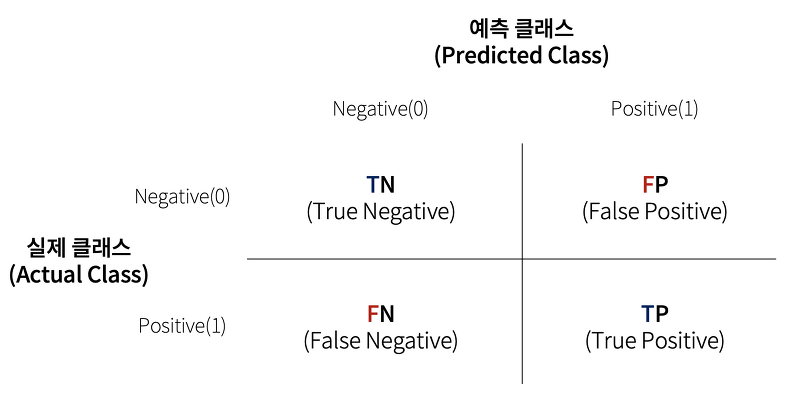

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, pred)

array([[103,  15],
       [ 15,  46]], dtype=int64)

## 정밀도와 재현율  
  
* 정밀도 = TP / (FP + TP) : True라고 예측한 값 중 실제 True 인 값의 비율  
* 재현율 = TP / (FN + TP) : 실제 정답이 True 인 값 중 True 인 값의 비율  
* 정밀도가 올라가면 재현율은 떨어지고, 재현율이 올라가면 정밀도는 떨어진다.  